# Shuttle Statlog Data Set Classifier - Breeder Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

In [2]:
import GeneticProgram as gp
from Statlog import load_statlog
from SamplingPolicies import *

## Import Data Set

In [3]:
# Data set already scaled
train_X, train_y, test_X, test_y, num_inputs, num_classes = load_statlog()

# Create scaler based only on the training set
scaler = MinMaxScaler()
scaler.fit(train_X)

# Scale datasets
train_X = scaler.transform(train_X)
test_X  = scaler.transform(test_X)

In [4]:
def breederDisplayCallback(string):
    clear_output(wait=True)
    display(string)

## Template GP Configuration

In [5]:
template_program = gp.Program(
     max_initial_instructions = 64,
     num_registers            = 8,
     num_inputs               = num_inputs,
     mutation_rate            = 0.1,
     max_num_instructions     = 96,
     num_classes              = num_classes
)

## Canonical GP with uniform sampling
Canonical linear GP exactly as implemented in Sandbox 1. Dataset sampled uniformly at each genration.

In [6]:
res = gp.errorMinBreederSelection(p_size                = 100,
                                  p_gap                 =  70,
                                  tau                   = 200,
                                  template_program      = template_program,
                                  sampling_policy_class = UniformSamplingPolicy,
                                  max_num_generations   = 500,
                                  X                     = train_X,
                                  y                     = train_y,
                                  display_fun           = breederDisplayCallback)

print(res[0].accuracy(train_X, train_y))
print(res[0].accuracy(test_X, test_y))
print(res[0].detectionRate(train_X, train_y))
print(res[0].detectionRate(test_X, test_y))

'Round 499 - Fitness 20.631752372812684'

0.9316551724137931
0.9312413793103448
0.38903613838850887
0.3891005334642289


## Canonical GP with balanced class sampling
Canonical linear GP exactly as implemented in Sandbox 1. Dataset sampled so that each class was represented equally.

In [7]:
res = gp.errorMinBreederSelection(p_size                = 100,
                                  p_gap                 =  70,
                                  tau                   = 200,
                                  template_program      = template_program,
                                  sampling_policy_class = ClassUniformSamplingPolicy,
                                  max_num_generations   = 500,
                                  X                     = train_X,
                                  y                     = train_y,
                                  display_fun           = breederDisplayCallback)
print(res[0].accuracy(train_X, train_y))
print(res[0].accuracy(test_X, test_y))
print(res[0].detectionRate(train_X, train_y))
print(res[0].detectionRate(test_X, test_y))

'Round 499 - Fitness 207.55653789252148'

0.8401149425287356
0.8470344827586207
0.5579090723239645
0.5711275248764175


In [8]:
all_accuracies = []
all_recalls    = []

## No fitness sharing, uniform sampling

In [9]:
no_sharing_uniform_sampling = []

for i in range(5):
    res = gp.breederSelection(p_size                = 100,
                              p_gap                 =  70,
                              tau                   = 200,
                              template_program      = template_program,
                              sampling_policy_class = UniformSamplingPolicy,
                              max_num_generations   = 400,
                              X                     = train_X,
                              y                     = train_y,
                              display_fun           = breederDisplayCallback)

    no_sharing_uniform_sampling.append(copy.deepcopy(res))

'Round 399 - Accuracy: 0.96 Recall: 0.4199586842523439'

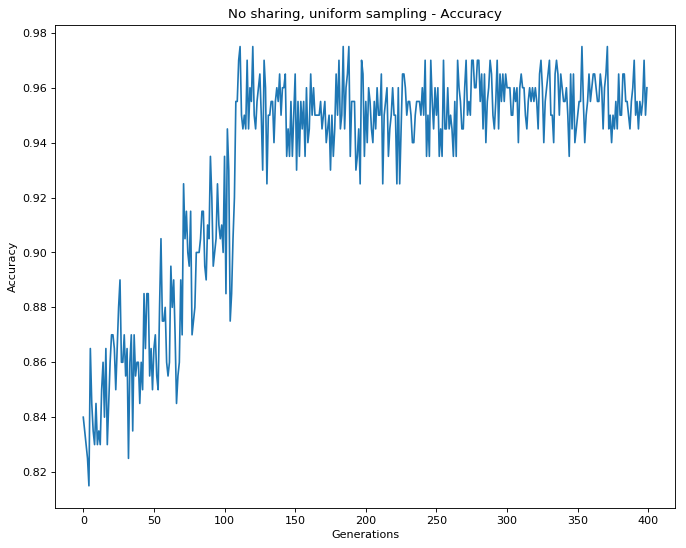

In [44]:
accuracies = []
for result in no_sharing_uniform_sampling:
    accuracies.append(result[1]['accuracy'])
accuracies = np.array(accuracies)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("No sharing, uniform sampling - Accuracy")
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.plot(np.median(accuracies, axis=0))

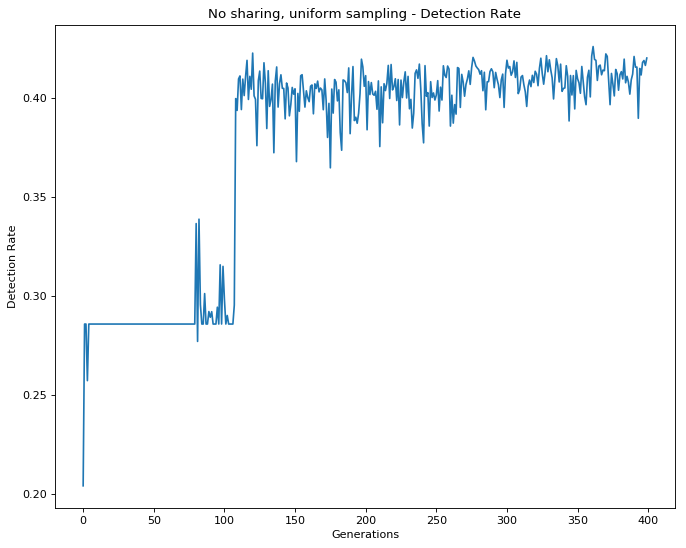

In [45]:
recall = []
for result in no_sharing_uniform_sampling:
    recall.append(result[1]['recall'])
recall = np.array(recall)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("No sharing, uniform sampling - Detection Rate")
plt.xlabel("Generations")
plt.ylabel("Detection Rate")
plt.plot(np.median(recall, axis=0))

In [12]:
all_accuracies.append(copy.deepcopy(np.median(accuracies, axis=0)))
all_recalls.append(copy.deepcopy(np.median(recall, axis=0)))

In [13]:
training_accuracies = []
for result in no_sharing_uniform_sampling:
    training_accuracies.append(result[0][0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.9563908045977011


In [14]:
test_accuracies = []
for result in no_sharing_uniform_sampling:
    test_accuracies.append(result[0][0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.9562758620689655


In [15]:
train_det_rates = []
for result in no_sharing_uniform_sampling:
    train_det_rates.append(result[0][0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.4037103971243892


In [16]:
test_det_rates = []
for result in no_sharing_uniform_sampling:
    test_det_rates.append(result[0][0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.4036152688346798


## No fitness sharing, balanced class sampling

In [17]:
no_sharing_class_sampling = []

for i in range(5):
    res = gp.breederSelection(p_size                = 100,
                              p_gap                 =  70,
                              tau                   = 200,
                              template_program      = template_program,
                              sampling_policy_class = ClassUniformSamplingPolicy,
                              max_num_generations   = 400,
                              X                     = train_X,
                              y                     = train_y,
                              display_fun           = breederDisplayCallback)

    no_sharing_class_sampling.append(copy.deepcopy(res))

'Round 399 - Accuracy: 0.54 Recall: 0.5453905700211118'

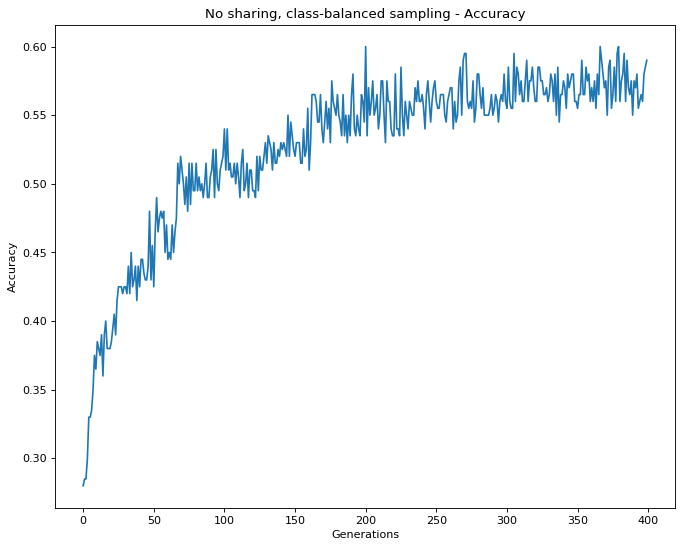

In [49]:
accuracies = []
for result in no_sharing_class_sampling:
    accuracies.append(result[1]['accuracy'])
accuracies = np.array(accuracies)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("No sharing, class-balanced sampling - Accuracy")
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.plot(np.median(accuracies, axis=0))

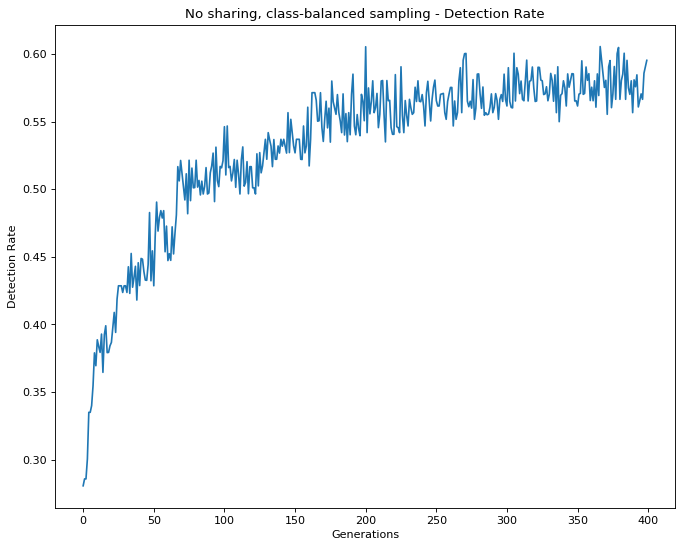

In [52]:
recall = []
for result in no_sharing_class_sampling:
    recall.append(result[1]['recall'])
recall = np.array(recall)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("No sharing, class-balanced sampling - Detection Rate")
plt.xlabel("Generations")
plt.ylabel("Detection Rate")
plt.plot(np.median(recall, axis=0))

In [20]:
all_accuracies.append(copy.deepcopy(np.median(accuracies, axis=0)))
all_recalls.append(copy.deepcopy(np.median(recall, axis=0)))

In [21]:
training_accuracies = []
for result in no_sharing_class_sampling:
    training_accuracies.append(result[0][0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.7364597701149426


In [22]:
test_accuracies = []
for result in no_sharing_class_sampling:
    test_accuracies.append(result[0][0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.7402068965517241


In [23]:
train_det_rates = []
for result in no_sharing_class_sampling:
    train_det_rates.append(result[0][0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.5784354621151878


In [24]:
test_det_rates = []
for result in no_sharing_class_sampling:
    test_det_rates.append(result[0][0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.5345004358522523


## Fitness sharing, uniform sampling

In [25]:
fitness_sharing_uniform_sampling = []

for i in range(5):
    res = gp.fitnessSharingBreederSelection(p_size                = 100,
                                            p_gap                 =  70,
                                            tau                   = 200,
                                            template_program      = template_program,
                                            sampling_policy_class = UniformSamplingPolicy,
                                            max_num_generations   = 400,
                                            X                     = train_X,
                                            y                     = train_y,
                                            display_fun           = breederDisplayCallback)

    fitness_sharing_uniform_sampling.append(copy.deepcopy(res))

'Round 399 - Accuracy: 0.92 Recall: 0.41323106423777567'

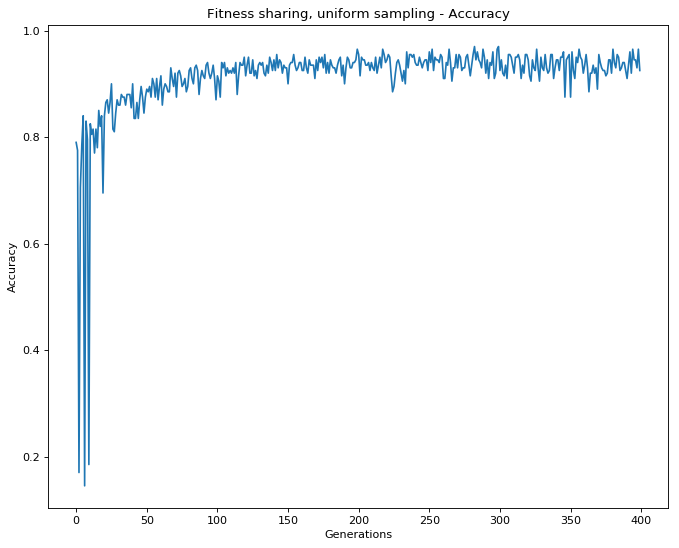

In [50]:
accuracies = []
for result in fitness_sharing_uniform_sampling:
    accuracies.append(result[1]['accuracy'])
accuracies = np.array(accuracies)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Fitness sharing, uniform sampling - Accuracy")
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.plot(np.median(accuracies, axis=0))

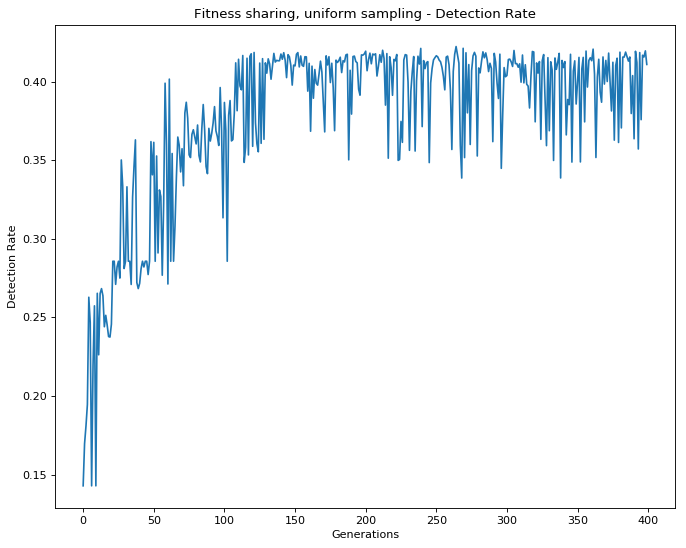

In [53]:
recall = []
for result in fitness_sharing_uniform_sampling:
    recall.append(result[1]['recall'])
recall = np.array(recall)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Fitness sharing, uniform sampling - Detection Rate")
plt.xlabel("Generations")
plt.ylabel("Detection Rate")
plt.plot(np.median(recall, axis=0))

In [28]:
all_accuracies.append(copy.deepcopy(np.median(accuracies, axis=0)))
all_recalls.append(copy.deepcopy(np.median(recall, axis=0)))

In [29]:
training_accuracies = []
for result in fitness_sharing_uniform_sampling:
    training_accuracies.append(result[0][0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.9257701149425287


In [30]:
test_accuracies = []
for result in fitness_sharing_uniform_sampling:
    test_accuracies.append(result[0][0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.9232413793103448


In [31]:
train_det_rates = []
for result in fitness_sharing_uniform_sampling:
    train_det_rates.append(result[0][0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.39917312070264216


In [32]:
test_det_rates = []
for result in fitness_sharing_uniform_sampling:
    test_det_rates.append(result[0][0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.3992423673074277


## Fitness sharing, balanced class sampling

In [33]:
fitness_sharing_class_sampling = []

for i in range(5):
    res = gp.fitnessSharingBreederSelection(p_size                = 100,
                                            p_gap                 =  70,
                                            tau                   = 200,
                                            template_program      = template_program,
                                            sampling_policy_class = ClassUniformSamplingPolicy,
                                            max_num_generations   = 400,
                                            X                     = train_X,
                                            y                     = train_y,
                                            display_fun           = breederDisplayCallback)

    fitness_sharing_class_sampling.append(copy.deepcopy(res))

'Round 399 - Accuracy: 0.665 Recall: 0.6641449683321604'

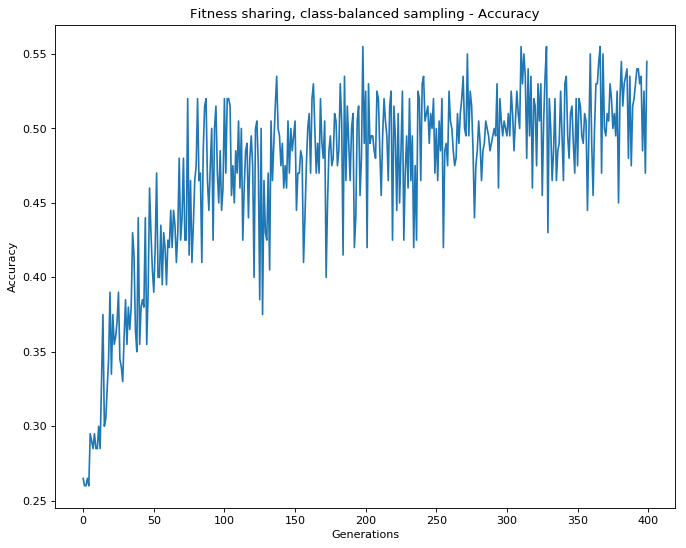

In [51]:
accuracies = []
for result in fitness_sharing_class_sampling:
    accuracies.append(result[1]['accuracy'])
accuracies = np.array(accuracies)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Fitness sharing, class-balanced sampling - Accuracy")
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.plot(np.median(accuracies, axis=0))

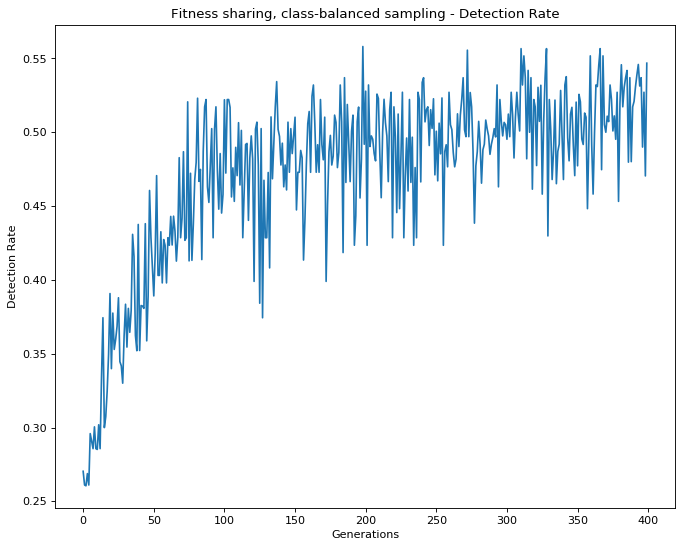

In [54]:
recall = []
for result in fitness_sharing_class_sampling:
    recall.append(result[1]['recall'])
recall = np.array(recall)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Fitness sharing, class-balanced sampling - Detection Rate")
plt.xlabel("Generations")
plt.ylabel("Detection Rate")
plt.plot(np.median(recall, axis=0))

In [36]:
all_accuracies.append(copy.deepcopy(np.median(accuracies, axis=0)))
all_recalls.append(copy.deepcopy(np.median(recall, axis=0)))

In [37]:
training_accuracies = []
for result in fitness_sharing_class_sampling:
    training_accuracies.append(result[0][0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.7122298850574713


In [38]:
test_accuracies = []
for result in fitness_sharing_class_sampling:
    test_accuracies.append(result[0][0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.7159310344827586


In [39]:
train_det_rates = []
for result in fitness_sharing_class_sampling:
    train_det_rates.append(result[0][0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.5200021752468654


In [40]:
test_det_rates = []
for result in fitness_sharing_class_sampling:
    test_det_rates.append(result[0][0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.5104796369422889


In [41]:
# Retain copy of results in case I do some tweaking
orig_all_accuracies = copy.deepcopy(all_accuracies)
orig_all_recalls    = copy.deepcopy(all_recalls)

## Accuracy Results

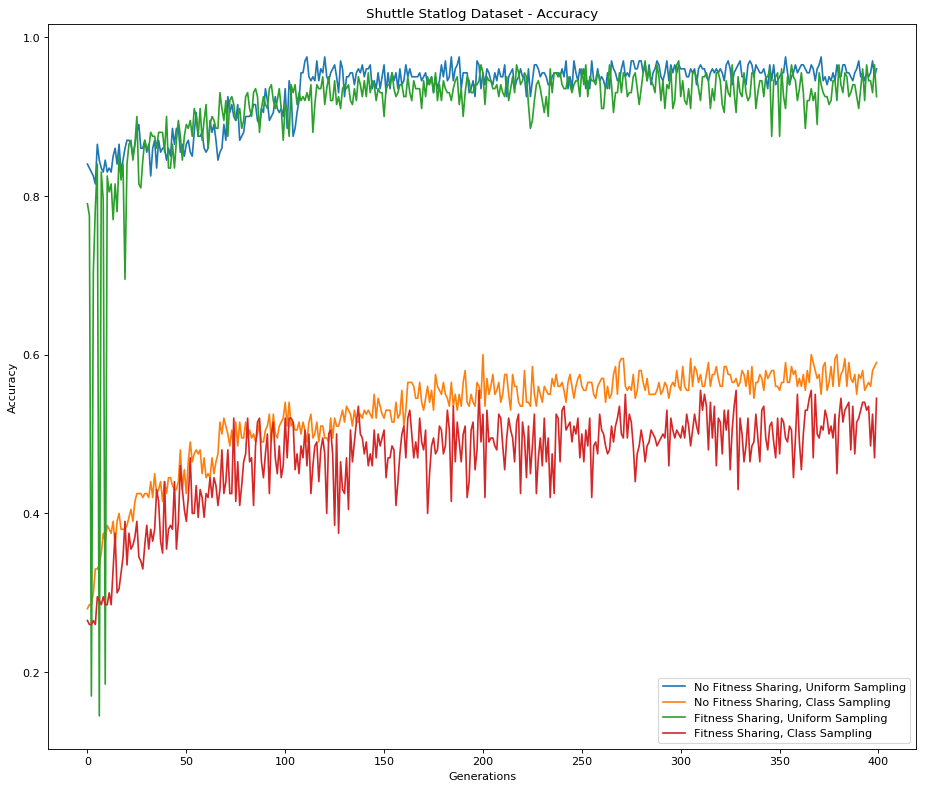

In [57]:
all_accuracies = np.array(all_accuracies)

# Scale datasets
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
for acc in all_accuracies:
    plt.plot(acc)

plt.legend([
    'No Fitness Sharing, Uniform Sampling',
    'No Fitness Sharing, Class Sampling',
    'Fitness Sharing, Uniform Sampling',
    'Fitness Sharing, Class Sampling'
])
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.title("Shuttle Statlog Dataset - Accuracy")
plt.show()

## Detection Rate Results

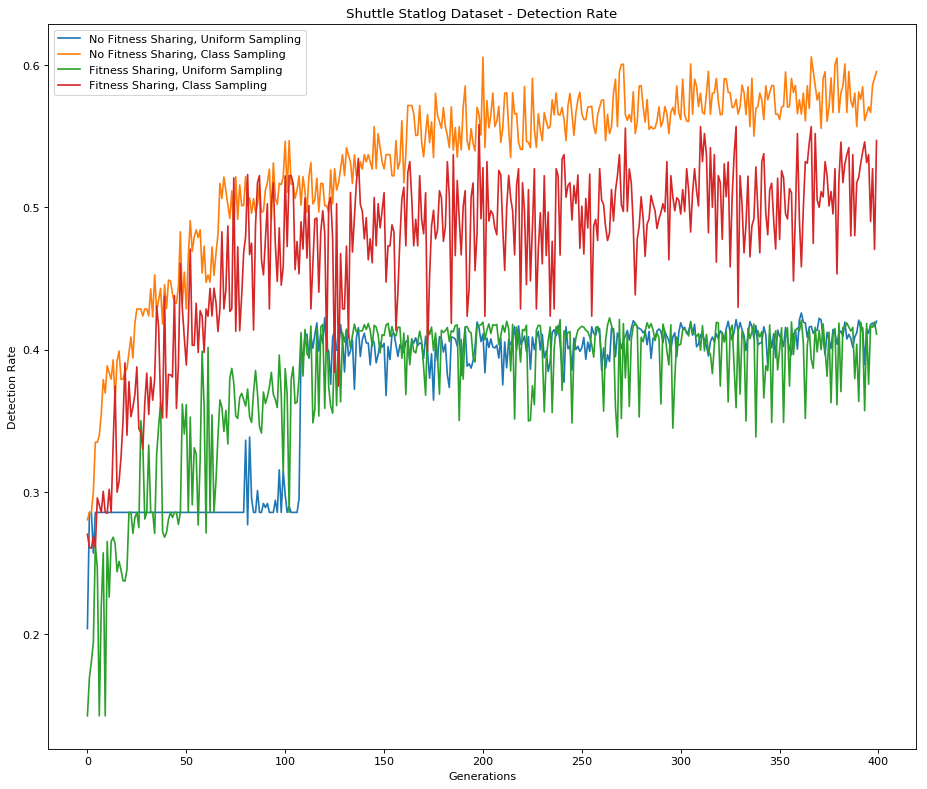

In [58]:
all_recalls = np.array(all_recalls)

# Scale datasets
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
for rec in all_recalls:
    plt.plot(rec)

plt.legend([
    'No Fitness Sharing, Uniform Sampling',
    'No Fitness Sharing, Class Sampling',
    'Fitness Sharing, Uniform Sampling',
    'Fitness Sharing, Class Sampling'
])
plt.xlabel("Generations")
plt.ylabel("Detection Rate")
plt.title("Shuttle Statlog Dataset - Detection Rate")
plt.show()